In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math as ma

In [2]:
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [3]:
#load the data set 
epi = pd.read_csv("epi_r.csv")

In [4]:
# first 5 rows
epi.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Columns of the data set
print("Columns of Epi_R Data Set :"  ,epi.columns)
print("Total columns in the Data set :",epi.shape[1])

Columns of Epi_R Data Set : Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=680)
Total columns in the Data set : 680


In [6]:
#info about data set
epi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [7]:
#Statistical Summary of the data
epi.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Analysis

**Handling null values and duplicates.**

There are 680 columns in the data set. Most important columns for our analysis are Title, Rating, Calories, Protein, Fat and Sodium as rest of the columns contains mostly 0. 
And then there are a lot of other features, most of them probably just indicates the presence or the absence of a particular ingredient, with 0.0 or 1.0.

So, we drop the columns which are not import as most of them are ingredients.

In [8]:
a = 0
for col in epi.iloc[:,6:].columns:
    if len(epi[epi[col]==1])<10:
        epi = epi.drop(columns=col)
        print(col)
        a = a+1

print(" Number of drop columns :", a)

#cakeweek
#wasteless
30 days of groceries
alabama
alaska
anthony bourdain
apple juice
arizona
aspen
atlanta
australia
beverly hills
biscuit
boston
bran
brooklyn
brownie
buffalo
bulgaria
burrito
cambridge
camping
canada
caviar
chicago
chili
cobbler/crumble
columbus
cook like a diner
cookbook critic
costa mesa
cranberry sauce
crêpe
cr��me de cacao
cuba
cupcake
custard
dallas
denver
digestif
dominican republic
dorie greenspan
eau de vie
egg nog
egypt
emeril lagasse
england
entertaining
epi + ushg
epi loves the microwave
flat bread
frankenrecipe
freezer food
friendsgiving
frittata
fritter
germany
grains
grand marnier
granola
grappa
guam
haiti
hamburger
hawaii
healdsburg
hollywood
house cocktail
houston
hummus
iced coffee
idaho
illinois
indiana
iowa
israel
italy
jamaica
japan
juicer
kansas
kansas city
kentucky
kitchen olympics
labor day
lancaster
las vegas
lasagna
lingonberry
london
long beach
louisiana
louisville
lychee
macaroni and cheese
maine
marinade
marscarpone
marshmallow
martini
mea

In [9]:
# Check the shape of the data
epi.shape

(20052, 513)

In [10]:
#Check for the null values
epi.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
yogurt           0
zucchini         0
snack            0
snack week       0
turkey           0
Length: 513, dtype: int64

There are quite a lot of missing values in 'calories', 'protein', 'fat' and 'sodium' coloumns and none in the others. Since the number of missing elements for these four columns are quite similar let's also check if there are a lot of rows with all of these informations missing.

In [11]:
# Numers of rows with all NaN values
all_nan = epi[["calories","protein","fat","sodium"]].isnull().all(axis = 1)
print(" Number of rows with Null Calories,fat,protein and sodium : ", sum(all_nan))

 Number of rows with Null Calories,fat,protein and sodium :  4117


In [12]:
# count of null values calories column
epi["calories"].isnull().sum()

4117

In [13]:
epi['calories'].shape

(20052,)

In [14]:
epi["calories"].describe().abs

<bound method NDFrame.abs of count    1.593500e+04
mean     6.322958e+03
std      3.590460e+05
min      0.000000e+00
25%      1.980000e+02
50%      3.310000e+02
75%      5.860000e+02
max      3.011122e+07
Name: calories, dtype: float64>

In [15]:
# eliminate rows in calories with abnormal values while retaing null values
epi = epi[(epi["calories"] <10000)| (epi['calories'].isnull()==1)]

In [16]:
# find the mean of the calories columns
calorie_avg = epi["calories"].mean()
calorie_avg

487.9006535126304

In [17]:
# now fill null values with mean value in calories column
epi.calories.fillna(calorie_avg,inplace = True)

In [18]:
# Summary
epi['calories'].describe()

count    20031.000000
mean       487.900654
std        536.611756
min          0.000000
25%        229.000000
50%        445.000000
75%        502.000000
max       9831.000000
Name: calories, dtype: float64

# Visualization

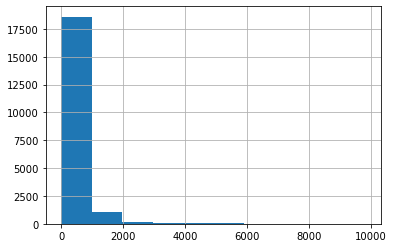

In [19]:
epi.calories.hist()
plt.show()

<AxesSubplot:xlabel='calories'>

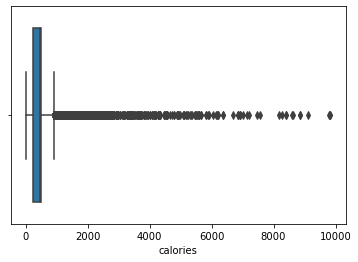

In [20]:
# Outlier detection
sns.boxplot(data=epi, x = "calories")

<AxesSubplot:ylabel='Density'>

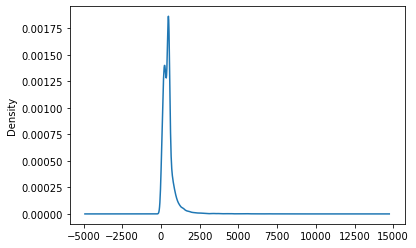

In [21]:
# distribution plot
epi.calories.plot.kde()

<AxesSubplot:ylabel='calories'>

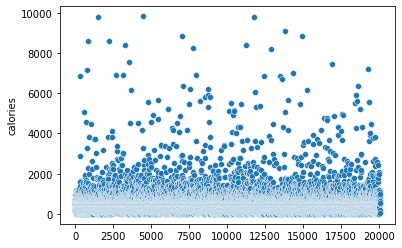

In [22]:
#
sns.scatterplot(data=epi["calories"])

In [23]:
# Explore rating column
epi.rating.isnull().sum()

0

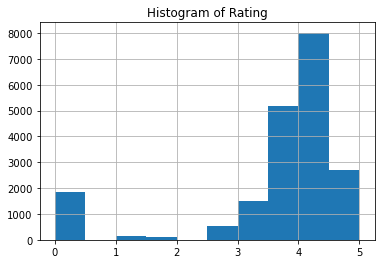

In [24]:
# frequency of different ratings
epi.rating.hist()
plt.title("Histogram of Rating")
plt.show()

<AxesSubplot:xlabel='rating'>

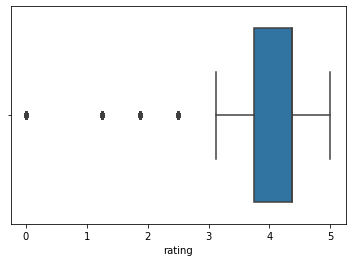

In [25]:
# Outlier detection
sns.boxplot(data=epi, x = "rating")

<AxesSubplot:ylabel='Density'>

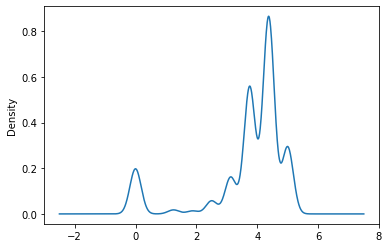

In [26]:
# distribution plot
epi.rating.plot.kde()

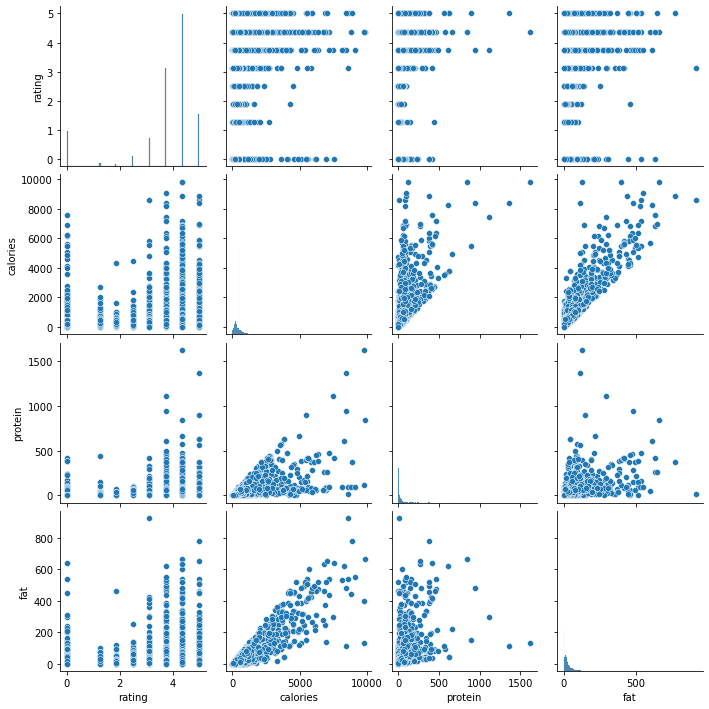

In [27]:
# 
sns.pairplot(data = epi.iloc[:,1:5])

**Duplicates**

In [28]:
# check for duplicate data
epi.duplicated().sum()

1797

In [29]:
# drop duplicates and keep last entry
epi.drop_duplicates(keep = "last", inplace = True)

In [30]:
epi.duplicated().sum()

0

In [31]:
# sort the data based on calories and rating
epi_sorted = epi.sort_values(by = ['calories','rating'], ascending=["false", 'True'])
epi_sorted.reset_index(drop = True, inplace = True)

In [32]:
# Now calculate mean of protein, fat, sodium
protein_mean = epi["protein"].mean()
fat_mean = epi["fat"].mean()
sodium_mean= epi["sodium"].mean()

In [33]:
# fill null values of protein, fat, sodium
# Protein
epi["protein"] = epi["protein"].fillna(epi["protein"].mean())

#sodium
epi["sodium"] = epi["sodium"].fillna(sodium_mean)

#fat
epi["fat"] = epi["fat"].fillna(fat_mean)

In [34]:
# check for null values
epi_1 = epi.iloc[:, :6]
epi_1.isnull().sum()

title       0
rating      0
calories    0
protein     0
fat         0
sodium      0
dtype: int64

**Correlation between rating,calories, protein, fat and sodium**.

In [35]:
# correlation matrix of numerical columns
corr_matrix = epi.iloc[:,1:6].corr().abs()
corr_matrix

,rating,calories,protein,fat,sodium
rating,1.000000,0.070453,0.073605,0.074935,0.020421
calories,0.070453,1.000000,0.691743,0.907986,0.222637
protein,0.073605,0.691743,1.000000,0.546069,0.344781
fat,0.074935,0.907986,0.546069,1.000000,0.144021
sodium,0.020421,0.222637,0.344781,0.144021,1.000000


<AxesSubplot:>

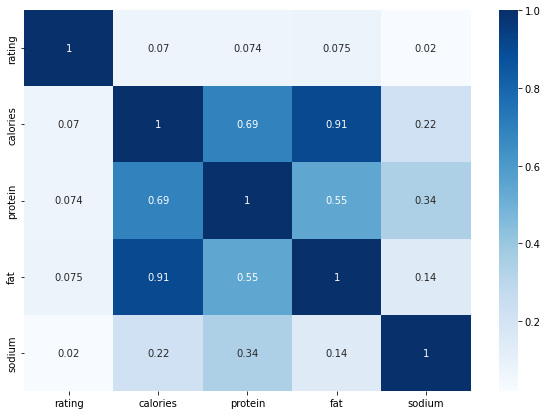

In [36]:
# Heatmap for correlated variable
# corr = epi_1[['rating','calories'	,'protein','fat','sodium']].corr()

fig,ax= plt.subplots()
fig.set_size_inches(10,7)
sns.heatmap(corr_matrix,annot=True, cmap="Blues")

<AxesSubplot:xlabel='calories', ylabel='protein'>

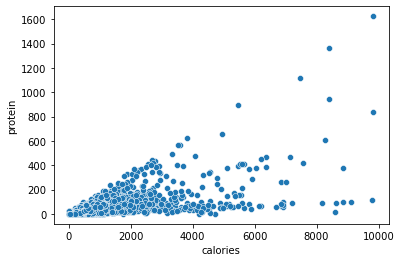

In [37]:
sns.scatterplot(data = epi, x= 'calories', y = "protein")

<AxesSubplot:xlabel='calories', ylabel='fat'>

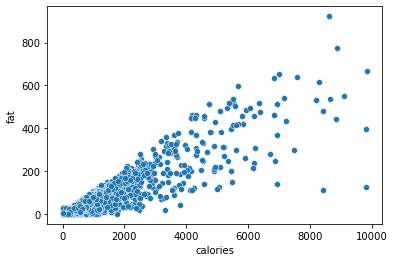

In [38]:
sns.scatterplot(data = epi, x= 'calories', y = "fat")

<AxesSubplot:xlabel='calories', ylabel='sodium'>

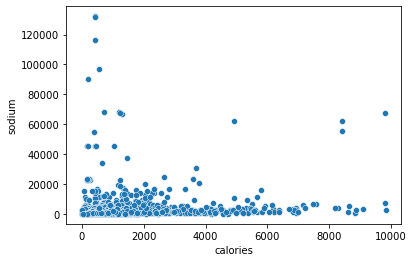

In [39]:
sns.scatterplot(data = epi, x= 'calories', y = "sodium")

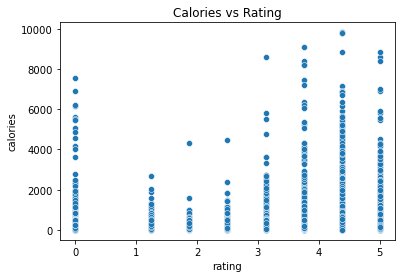

In [62]:
sns.scatterplot(x= 'rating', y = 'calories', data = epi)
plt.title("Calories vs Rating")
plt.show()

**Some of the inferences from the above correlation map are:**

1. Since "Calories" and "fat" has got strong correlation with each other, during model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.

2. Calories and fat are highly corelated and both have positive but correlation with sodium.

3. Calories and fat features has got positive correlation with sodium.

4. Rating will not be really useful numerical feature for any future prediction and it is visible from it correlation value with Calories, fat etc.


# Now Make a Random Meal based on the above data with breakfast, lunch and dinner.

In [49]:
# Check for lunch, dinner and breakfast
lunch = epi[epi['lunch']==1.0]
print("Lunch : ", lunch.shape)

breakfast= epi[epi['breakfast']==1.0]
print("Breakfast:", breakfast.shape)

dinner = epi[epi['dinner']==1.0]
print("Dinner : ", dinner.shape)

Lunch :  (1294, 513)
Breakfast: (684, 513)
Dinner :  (2551, 513)


In [51]:
# Generate a random meal plan 
print("Today's Meal Plan : \n")
print(breakfast['title'].sample())
print(lunch['title'].sample())
print(dinner['title'].sample())

Today's Meal Plan : 

10966    Cornmeal Crepes with Ricotta and Ham 
Name: title, dtype: object
18086    Grilled Open-Faced Vegetable, Pesto, and Mozza...
Name: title, dtype: object
12751    Spit-Roasted Chicken with Herbs Under the Skin...
Name: title, dtype: object


*As data set includes veg and non-veg columns. Thus we can compare veg and non-veg meals and compare their calories.*

<AxesSubplot:>

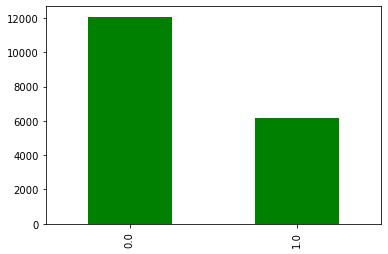

In [42]:
# Number of veg and non-veg eaters
epi['vegetarian'].value_counts().plot.bar(color = "Green")

In [43]:
# Veg Column
veg= epi[epi["vegetarian"]==1.0]
veg.shape

(6165, 513)

In [44]:
# Non-Veg
non_veg = epi[epi["vegetarian"]==0.0]
non_veg.shape

(12069, 513)

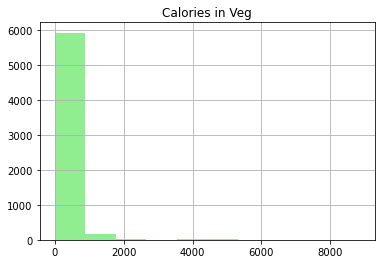

In [56]:
# Histogram of calories in veg dishes
veg.calories.hist(color = 'lightgreen')
plt.title("Calories in Veg")
plt.show()

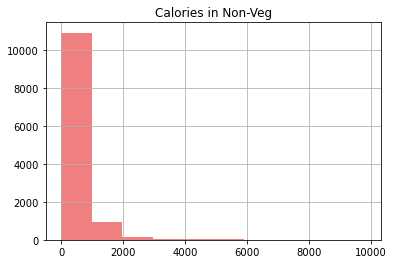

In [59]:
# Histogram of calories in non-veg dishes
non_veg.calories.hist(color = 'lightcoral')
plt.title("Calories in Non-Veg")
plt.show()

(array([[5.9890e+03, 1.1400e+02, 2.6000e+01, 1.0000e+01, 1.4000e+01,
         5.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00],
        [1.0899e+04, 9.2400e+02, 1.3500e+02, 4.4000e+01, 2.0000e+01,
         2.2000e+01, 1.0000e+01, 6.0000e+00, 4.0000e+00, 5.0000e+00]]),
 array([   0. ,  983.1, 1966.2, 2949.3, 3932.4, 4915.5, 5898.6, 6881.7,
        7864.8, 8847.9, 9831. ]),
 <a list of 2 BarContainer objects>)

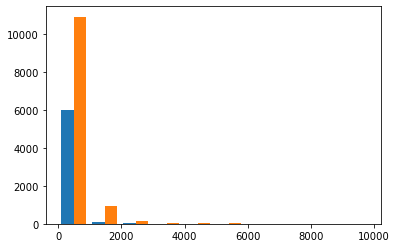

In [47]:
# Comparison of calories in Veg and Non-veg Dishes
plt.hist([veg['calories'], non_veg['calories']])

Non Veg Dishes has maximum calories near 6000 as compare to veg max calories approximately 5000.

**Now check normality of various columns**

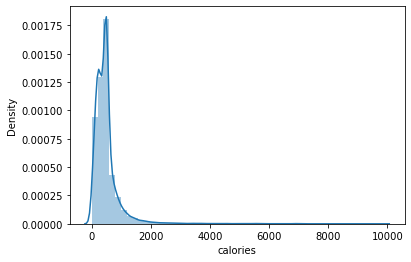

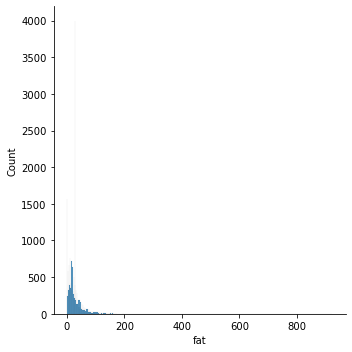

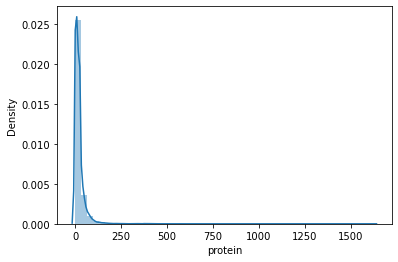

In [48]:
# Calories 
sns.distplot(epi['calories'])
plt.show()

# fat
sns.displot(epi['fat'])
plt.show()

#protein
sns.distplot(epi["protein"])
plt.show()

*None of them are normally distribution as all three has skewed distributions.*

In [66]:
# Saving the data frame
epi.to_csv("epi_df.csv")


*Thanks a lot.*